In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [45]:
df = pd.read_csv("C:/Users/Vic/Desktop/Data Scienece/Kaggle/Dataset_Hospital_Visits.csv")

Description of the data set

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88421 entries, 0 to 88420
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PatientId        88421 non-null  float64
 1   AppointmentID    88421 non-null  int64  
 2   Sex              88421 non-null  object 
 3   ScheduledDate    88421 non-null  object 
 4   AppointmentDate  88421 non-null  object 
 5   Age              79614 non-null  float64
 6   Community        77708 non-null  object 
 7   SocialWelfare    75902 non-null  object 
 8   Hipertension     80400 non-null  object 
 9   Diabetes         88421 non-null  object 
 10  Alcoholism       73532 non-null  object 
 11  Handcap          88421 non-null  object 
 12  SMS_received     88421 non-null  object 
 13  No-show          88421 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 9.4+ MB


In [47]:
df.describe()

,PatientId,AppointmentID,Age
count,8.842100e+04,8.842100e+04,79614.000000
mean,1.485355e+14,5.675199e+06,37.067903
std,2.572424e+14,7.145639e+04,23.140942
min,3.921784e+04,5.030230e+06,0.000000
25%,4.194616e+12,5.640214e+06,18.000000
50%,3.189960e+13,5.680520e+06,37.000000
75%,9.465347e+13,5.725486e+06,55.000000
max,9.999816e+14,5.790484e+06,115.000000


In [48]:
df.head()

,PatientId,AppointmentID,Sex,ScheduledDate,AppointmentDate,Age,Community,SocialWelfare,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,4.738527e+13,5387604,F,2016-02-24T07:53:17Z,2016-05-13T00:00:00Z,NaN,RESISTÊNCIA,no,no,no,no,no,no,No
1,6.557495e+13,5655266,M,2016-05-03T16:29:14Z,2016-05-12T00:00:00Z,4.0,NaN,NaN,NaN,no,no,no,no,No
2,1.265473e+11,5745855,F,2016-05-30T12:54:18Z,2016-05-30T00:00:00Z,19.0,JARDIM DA PENHA,no,no,no,no,no,no,No
3,2.681769e+13,5700247,F,2016-05-16T09:15:51Z,2016-05-16T00:00:00Z,55.0,JESUS DE NAZARETH,no,yes,no,no,no,no,No
4,7.813565e+13,5656211,F,2016-05-04T07:46:23Z,2016-05-04T00:00:00Z,0.0,ITARARÉ,NaN,no,no,no,no,no,No


In [49]:
df.tail()

,PatientId,AppointmentID,Sex,ScheduledDate,AppointmentDate,Age,Community,SocialWelfare,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
88416,1.454831e+14,5772271,F,2016-06-03T15:01:39Z,2016-06-06T00:00:00Z,32.0,TABUAZEIRO,no,no,no,no,no,no,No
88417,3.257342e+13,5636567,M,2016-04-28T15:38:16Z,2016-05-05T00:00:00Z,7.0,NaN,no,no,no,NaN,no,yes,No
88418,3.888198e+12,5778538,F,2016-06-06T15:46:02Z,2016-06-08T00:00:00Z,50.0,MARIA ORTIZ,NaN,no,no,no,no,no,No
88419,7.854955e+10,5787782,F,2016-06-08T10:35:20Z,2016-06-08T00:00:00Z,39.0,PRAIA DO SUÁ,no,no,no,NaN,no,no,No
88420,6.581160e+13,5666176,F,2016-05-05T16:05:12Z,2016-05-10T00:00:00Z,48.0,JOANA D´ARC,no,no,no,no,no,no,No


Data Visualization

<Axes: xlabel='No-show', ylabel='count'>

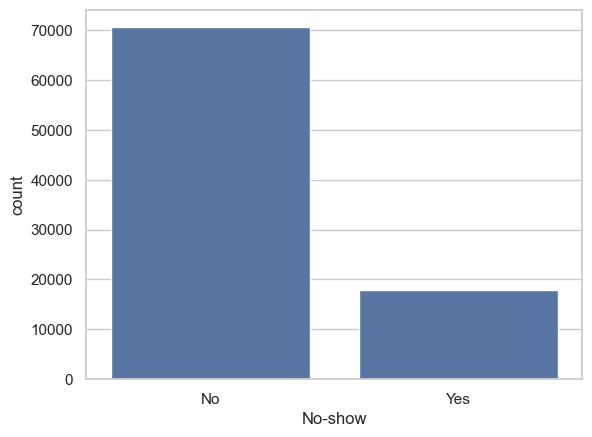

In [50]:
sns.countplot(x='No-show', data=df)

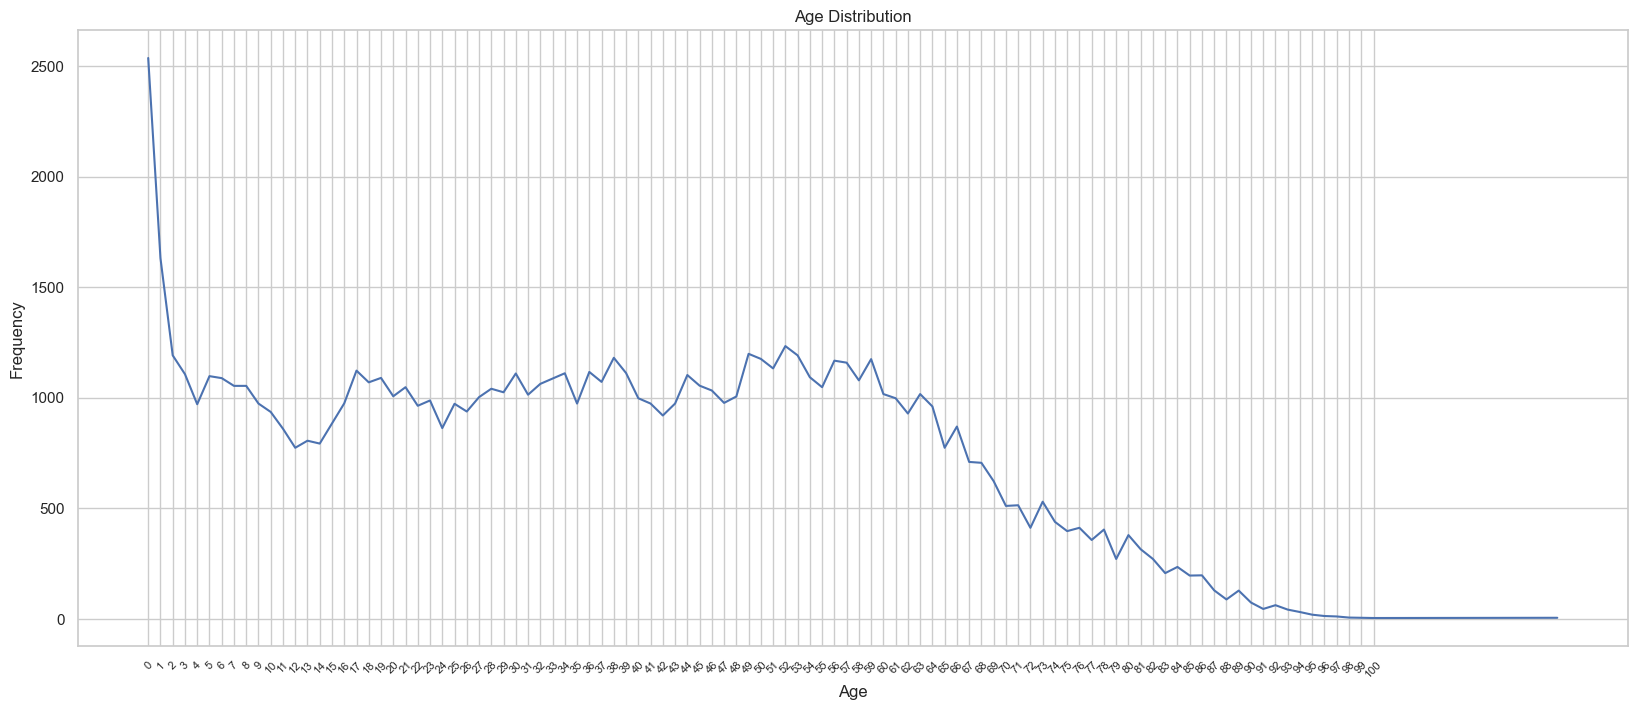

In [51]:
# Count the frequency of each age
age_counts = df['Age'].dropna().value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(20, 8))  # Adjust the size for better visibility
sns.lineplot(x=age_counts.index, y=age_counts.values)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(fontsize=8, rotation=45)
plt.xticks(range(0, 101, 1))  # Set x-axis ticks to show every age
plt.show()

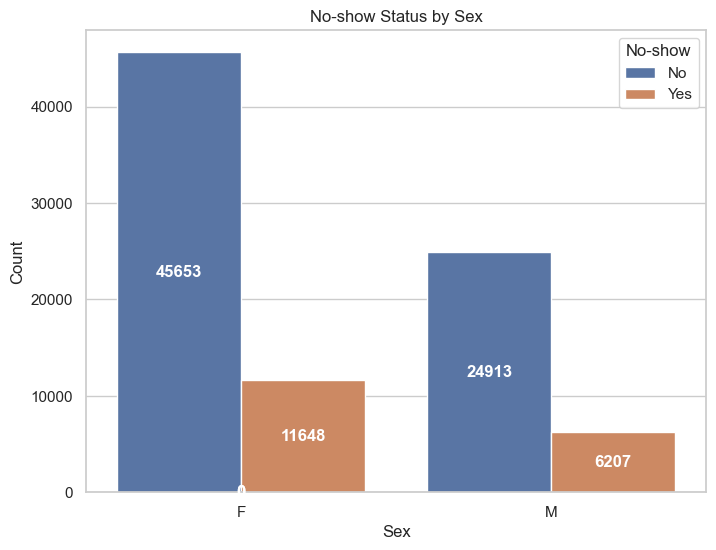

In [52]:
# Visualization of No-Shows by Sex
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Sex', hue='No-show', data=df)
plt.title('No-show Status by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='No-show', loc='upper right')

# Adding the count numbers inside the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height / 2,
            f'{int(height)}',
            ha='center', va='center', color='white', fontweight='bold')

plt.show()

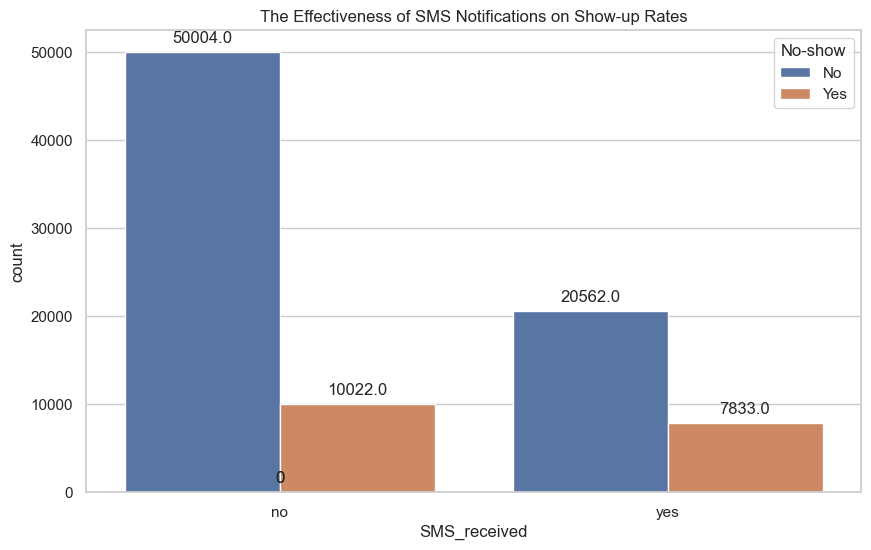

In [53]:
#Does receiving an SMS make more people show up to their appointments?

#sns.countplot(x='SMS_received', hue='No-show', data=df)
#plt.title('The Effectiveness of SMS Notifications on Show-up Rates')
#plt.xlabel('SMS Received')
#plt.ylabel('Count')

plt.figure(figsize=(10, 6))  # Adjust the size as needed
sns.countplot(x='SMS_received', hue='No-show', data=df)
plt.title('The Effectiveness of SMS Notifications on Show-up Rates')

ax = plt.gca()  # Get the current axes
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# interpretation: it doesn't make much of a difference... 
# also: no-show = 0 means the patient showed up

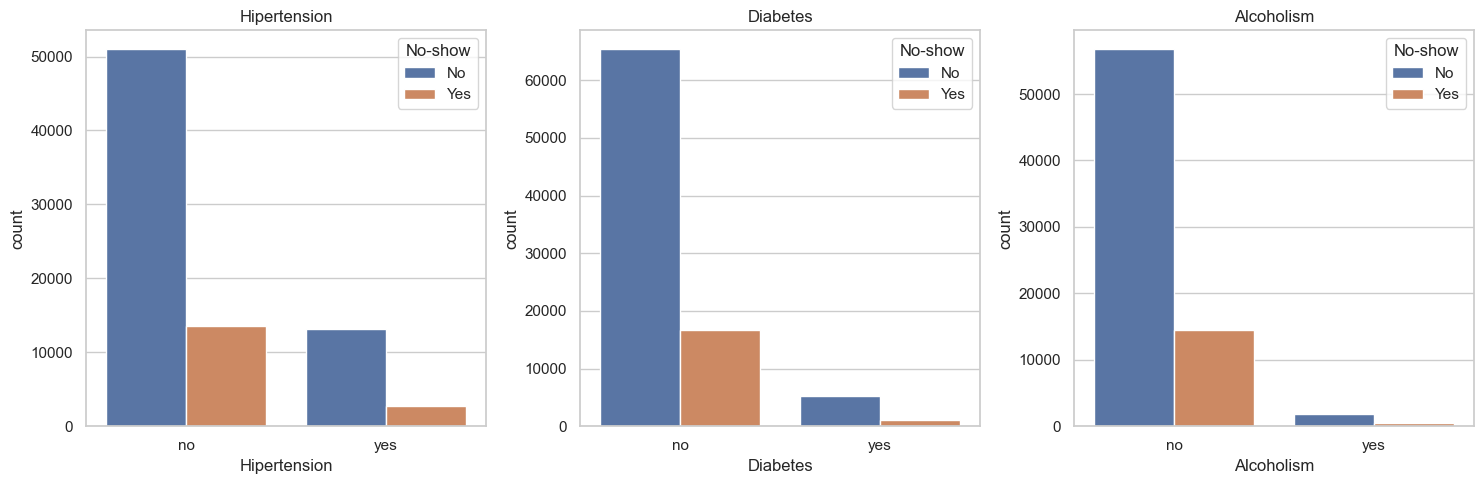

In [54]:


sns.set(style="whitegrid")  # Optional: Set the style

# Create a subplot for each categorical variable
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  # Adjust the number of columns as needed

# Plot for 'Hipertension'
sns.countplot(x='Hipertension', hue='No-show', data=df, ax=axes[0])
axes[0].set_title('Hipertension')

# Plot for 'Diabetes'
sns.countplot(x='Diabetes', hue='No-show', data=df, ax=axes[1])
axes[1].set_title('Diabetes')

# Plot for 'Alcoholism'
sns.countplot(x='Alcoholism', hue='No-show', data=df, ax=axes[2])
axes[2].set_title('Alcoholism')


plt.tight_layout()  # Optional: Adjust layout for better spacing
plt.show()

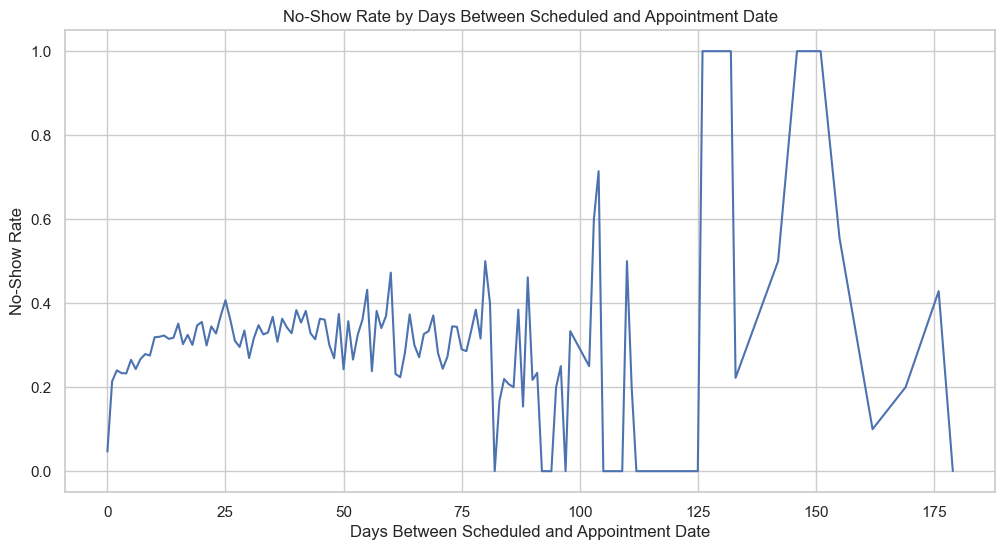

In [55]:
# Convert 'ScheduledDate' and 'AppointmentDate' to datetime, focusing only on the date part
df['ScheduledDate'] = pd.to_datetime(df['ScheduledDate']).dt.date
df['AppointmentDate'] = pd.to_datetime(df['AppointmentDate']).dt.date

# Calculate the time difference in days & create new column 'DaysBetween'
df['DaysBetween'] = (pd.to_datetime(df['AppointmentDate']) - pd.to_datetime(df['ScheduledDate'])).dt.days

# Remove cases where the difference is negative (errors in data)
df = df[df['DaysBetween'] >= 0]

# Group by 'DaysBetween' and calculate no-show rate
no_show_rate = df.groupby('DaysBetween')['No-show'].apply(lambda x: (x == 'Yes').mean())

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x=no_show_rate.index, y=no_show_rate.values)
plt.title('No-Show Rate by Days Between Scheduled and Appointment Date')
plt.xlabel('Days Between Scheduled and Appointment Date')
plt.ylabel('No-Show Rate')
plt.show()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88417 entries, 0 to 88420
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PatientId        88417 non-null  float64
 1   AppointmentID    88417 non-null  int64  
 2   Sex              88417 non-null  object 
 3   ScheduledDate    88417 non-null  object 
 4   AppointmentDate  88417 non-null  object 
 5   Age              79611 non-null  float64
 6   Community        77704 non-null  object 
 7   SocialWelfare    75899 non-null  object 
 8   Hipertension     80396 non-null  object 
 9   Diabetes         88417 non-null  object 
 10  Alcoholism       73529 non-null  object 
 11  Handcap          88417 non-null  object 
 12  SMS_received     88417 non-null  object 
 13  No-show          88417 non-null  object 
 14  DaysBetween      88417 non-null  int64  
dtypes: float64(2), int64(2), object(11)
memory usage: 10.8+ MB


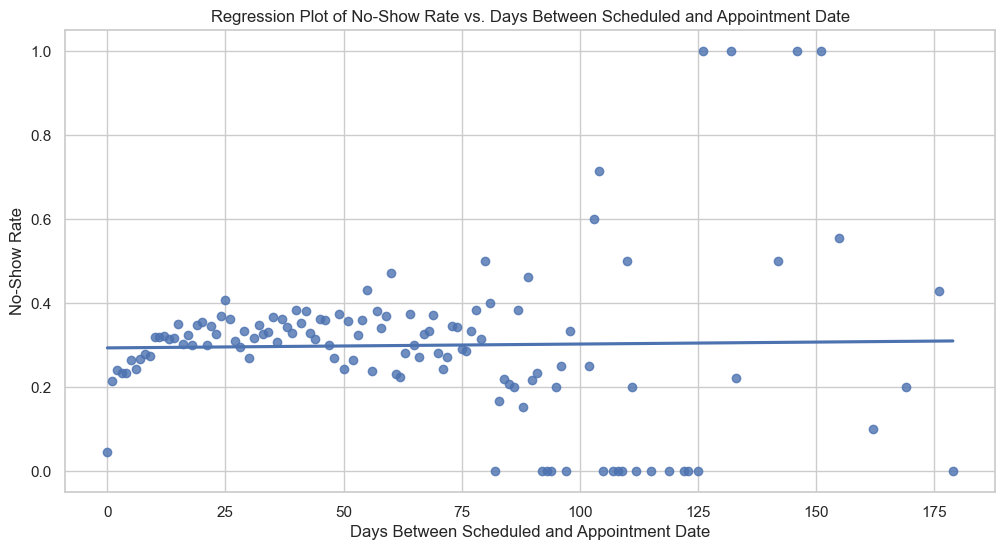

In [57]:
# Convert the no_show_rate Series to a DataFrame for easier plotting
no_show_rate_df = no_show_rate.reset_index()

# Create the regression plot
plt.figure(figsize=(12, 6))
sns.regplot(x='DaysBetween', y='No-show', data=no_show_rate_df, logistic=True, ci=None)

plt.title('Regression Plot of No-Show Rate vs. Days Between Scheduled and Appointment Date')
plt.xlabel('Days Between Scheduled and Appointment Date')
plt.ylabel('No-Show Rate')
plt.show()

In [58]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Example usage with your DataFrame
cramers_v_value = cramers_v(df['No-show'], df['DaysBetween'])
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.29867620082649593


Analysis of missing data missing data

In [59]:
missing_values = df.isnull().sum()

print("Total Missing Values in Each Column:")
print(missing_values)

Total Missing Values in Each Column:
PatientId              0
AppointmentID          0
Sex                    0
ScheduledDate          0
AppointmentDate        0
Age                 8806
Community          10713
SocialWelfare      12518
Hipertension        8021
Diabetes               0
Alcoholism         14888
Handcap                0
SMS_received           0
No-show                0
DaysBetween            0
dtype: int64


In [60]:
total_missing = df.isnull().sum().sum()

print("Total Missing Values in the Entire DataFrame:", total_missing)

Total Missing Values in the Entire DataFrame: 54946


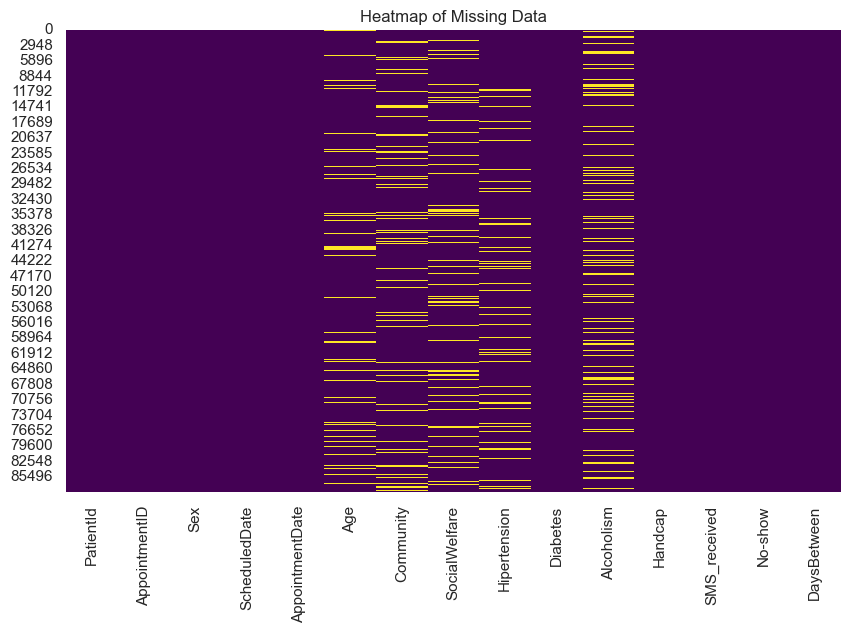

In [61]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data')
plt.show()

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88417 entries, 0 to 88420
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PatientId        88417 non-null  float64
 1   AppointmentID    88417 non-null  int64  
 2   Sex              88417 non-null  object 
 3   ScheduledDate    88417 non-null  object 
 4   AppointmentDate  88417 non-null  object 
 5   Age              79611 non-null  float64
 6   Community        77704 non-null  object 
 7   SocialWelfare    75899 non-null  object 
 8   Hipertension     80396 non-null  object 
 9   Diabetes         88417 non-null  object 
 10  Alcoholism       73529 non-null  object 
 11  Handcap          88417 non-null  object 
 12  SMS_received     88417 non-null  object 
 13  No-show          88417 non-null  object 
 14  DaysBetween      88417 non-null  int64  
dtypes: float64(2), int64(2), object(11)
memory usage: 10.8+ MB


Data Preparation
- How and why did you select the features?
- Did you derive new features?
- How did you deal with missing data?
- How and why did you transform the data?

In [63]:
cramers_sms_received_value = cramers_v(df['No-show'], df['SMS_received'])
print("Cramér's V:", cramers_sms_received_value)

cramers_v_value = cramers_v(df['No-show'], df['DaysBetween'])
print("Cramér's V:", cramers_v_value)

cramers_alc_value = cramers_v(df['No-show'], df['Alcoholism'])
print("Cramér's V:", cramers_alc_value)

Cramér's V: 0.12665786818799732
Cramér's V: 0.29867620082649593
Cramér's V: 0.0


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
# Changes output of the transformers to Pandas
from sklearn import set_config
set_config(transform_output="pandas")

# import the imputing function
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [65]:
features = ['AppointmentID', 'Age', 'Sex', 'DaysBetween', 'SMS_received', 'Hipertension', 'Diabetes', 'Alcoholism', 'SocialWelfare']
num_features = ['Age', 'DaysBetween']
cat_features = ['Sex', 'SMS_received', 'Hipertension', 'Diabetes', 'Alcoholism', 'SocialWelfare']
X = df[features]
y = df['No-show']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#Target variable y is what we are trying to predict or explain. y = target variable
#defined it by extracting it from the DataFrame

In [66]:
X

,AppointmentID,Age,Sex,DaysBetween,SMS_received,Hipertension,Diabetes,Alcoholism,SocialWelfare
0,5387604,NaN,F,79,no,no,no,no,no
1,5655266,4.0,M,9,no,NaN,no,no,NaN
2,5745855,19.0,F,0,no,no,no,no,no
3,5700247,55.0,F,0,no,yes,no,no,no
4,5656211,0.0,F,0,no,no,no,no,NaN
...,...,...,...,...,...,...,...,...,...
88416,5772271,32.0,F,3,no,no,no,no,no
88417,5636567,7.0,M,7,yes,no,no,NaN,no
88418,5778538,50.0,F,2,no,no,no,no,NaN
88419,5787782,39.0,F,0,no,no,no,NaN,no


In [67]:
df.columns

Index(['PatientId', 'AppointmentID', 'Sex', 'ScheduledDate', 'AppointmentDate',
       'Age', 'Community', 'SocialWelfare', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show', 'DaysBetween'],
      dtype='object')

In [68]:
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent') # mode = most frequent
# Definition of imputers

In [69]:
ohe = OneHotEncoder(handle_unknown='ignore', drop='if_binary', sparse_output=False)
# Definition of OneHotEncoder

In [70]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_imputer, num_features),
        ('cat', Pipeline(steps=[('imputer', cat_imputer),
                                ('onehot', ohe)]), cat_features)
    ]
)

In [71]:
from sklearn.ensemble import RandomForestClassifier

rfc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [72]:
rfc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Age', 'DaysBetween']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'SMS_received',
                                                   'Hipertension', 'Diabetes',
                                                   'Alcoholism',
                                                   'SocialWelfare'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [73]:
y_pred = rfc_pipeline.predict(X_test)

In [74]:
# get test-data
test_df = pd.read_csv("C:/Users/Vic/Desktop/Data Scienece/Kaggle/test.csv")

In [75]:
# Convert 'ScheduledDate' and 'AppointmentDate' to datetime, focusing only on the date part
test_df['ScheduledDate'] = pd.to_datetime(test_df['ScheduledDate']).dt.date
test_df['AppointmentDate'] = pd.to_datetime(test_df['AppointmentDate']).dt.date

# Calculate the time difference in days & create new column 'DaysBetween'
test_df['DaysBetween'] = (pd.to_datetime(test_df['AppointmentDate']) - pd.to_datetime(test_df['ScheduledDate'])).dt.days

In [76]:
predictions_test = rfc_pipeline.predict(test_df)

In [77]:
combined_df = pd.concat([test_df, X_test])
# Here I Added DaysBetween in test_df

In [78]:
submission = pd.DataFrame({'AppointmentID': test_df['AppointmentID'], 'No-show': predictions_test})

In [79]:
filepath = 'Victor_upload1.csv'
submission.to_csv(filepath, index=False)

In [91]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22106 entries, 0 to 22105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PatientId        22106 non-null  float64
 1   AppointmentID    22106 non-null  int64  
 2   Sex              22106 non-null  object 
 3   ScheduledDate    22106 non-null  object 
 4   AppointmentDate  22106 non-null  object 
 5   Age              19955 non-null  float64
 6   Community        19461 non-null  object 
 7   SocialWelfare    19043 non-null  object 
 8   Hipertension     20089 non-null  object 
 9   Diabetes         22106 non-null  object 
 10  Alcoholism       18371 non-null  object 
 11  Handcap          22106 non-null  object 
 12  SMS_received     22106 non-null  object 
 13  DaysBetween      22106 non-null  int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 2.4+ MB


In [94]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17684 entries, 59208 to 19786
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AppointmentID  17684 non-null  int64  
 1   Age            15902 non-null  float64
 2   Sex            17684 non-null  object 
 3   DaysBetween    17684 non-null  int64  
 4   SMS_received   17684 non-null  object 
 5   Hipertension   16137 non-null  object 
 6   Diabetes       17684 non-null  object 
 7   Alcoholism     14731 non-null  object 
 8   SocialWelfare  15192 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.3+ MB


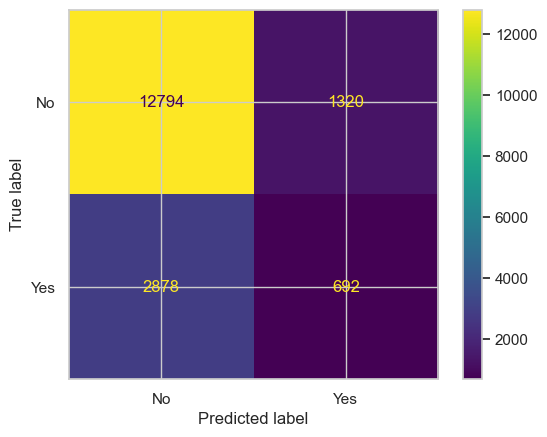

In [80]:
# Create a confusion matrix that compares the predicted labels with the correct labels of the test set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

display_labels=['No', 'Yes']

class_labels = rfc_pipeline.named_steps['classifier'].classes_

cm = confusion_matrix(y_test, y_pred, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=display_labels)
disp.plot()
plt.show()

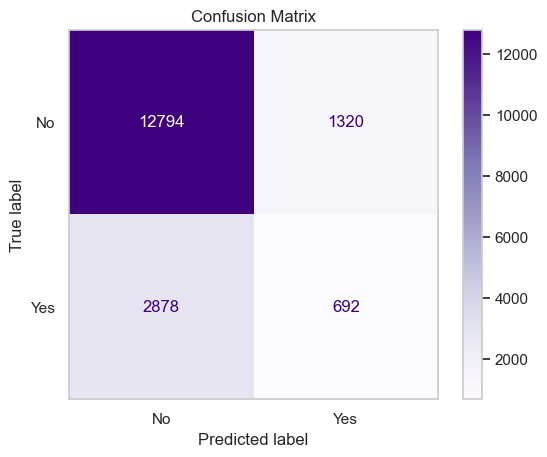

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have trained and tested your model and obtained predictions (y_pred, y_test)
# Replace 'rfc_pipeline' and 'classifier' with the actual names in your pipeline
class_labels = rfc_pipeline.named_steps['classifier'].classes_
display_labels = ['No', 'Yes']

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=class_labels)

# Display confusion matrix without grid lines
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=plt.cm.Purples, include_values=True, values_format='d')  # You can change the colormap if needed
plt.title('Confusion Matrix')
plt.grid(False) 
plt.show()

In [82]:
# Print a classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.82      0.91      0.86     14114
         Yes       0.34      0.19      0.25      3570

    accuracy                           0.76     17684
   macro avg       0.58      0.55      0.55     17684
weighted avg       0.72      0.76      0.74     17684



In [83]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7626102691698711


In [84]:
from sklearn.model_selection import GridSearchCV
params = {
    "classifier__max_depth": range(1, 12),  #This means max dept is a hyperparameter of the classifier
    "classifier__criterion": ["gini", "entropy"]
}

In [85]:
opt_rfc = GridSearchCV(rfc_pipeline, params, scoring="accuracy", n_jobs=-1, cv=10, verbose=1, return_train_score=True)

In [86]:
opt_rfc.fit(X_train, y_train)

Fitting 10 folds for each of 22 candidates, totalling 220 fits

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(),
                                                                         ['Age',
                                                                          'DaysBetween']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Sex',
                                                                          'SMS_received',
                                                                          'Hipertension',
                                                                          'Diabetes',
                                                                          'Alcoholism',
                                                                          'SocialWelfare'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': range(1, 12)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [87]:
y_pred1 = opt_rfc.predict(X_test)

In [88]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

          No       0.80      1.00      0.89     14114
         Yes       0.71      0.00      0.00      3570

    accuracy                           0.80     17684
   macro avg       0.76      0.50      0.45     17684
weighted avg       0.78      0.80      0.71     17684



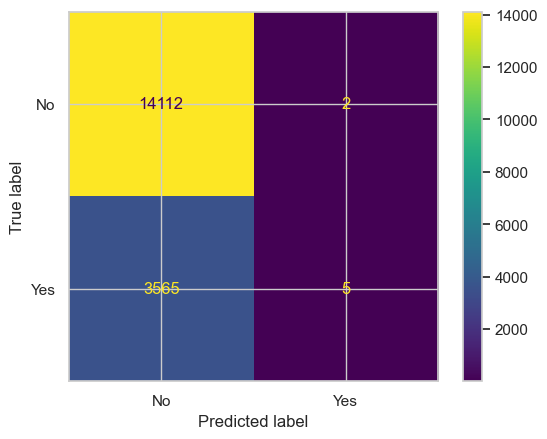

In [89]:
# Create a confusion matrix that compares the predicted labels with the correct labels of the test set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

display_labels=['No', 'Yes']

class_labels = rfc_pipeline.named_steps['classifier'].classes_

cm = confusion_matrix(y_test, y_pred1, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=display_labels)
disp.plot()
plt.show()